### Exploring the corpus

We have 3 main objectives here
1. Finding the most common word for each of the comedians
2. The size of the vocabulary for each of the comedians
3. Amount of profanity by each comedian

### 1. Most common words

In [54]:
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0


In [55]:
# Find the most common (top 30 words) said by each comedian

top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending = False).head(30)
    top_dict[c] = list(zip(top.index, top.values))

In [56]:
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

ali
like, know, na, shit, gon, woman, ok, lot, come, oh, time, day, ta, husband
---
anthony
say, joke, like, know, thing, guy, day, anthony, tell, think, people, make, na, time
---
bill
like, right, know, fuck, na, gon, yeah, come, shit, think, guy, want, say, make
---
bo
know, like, think, love, bo, say, stuff, fuck, repeat, want, yeah, right, eye, people
---
dave
like, know, say, fuck, shit, people, ahah, time, black, come, man, guy, look, woman
---
hasan
like, know, dad, say, want, look, love, time, hasan, right, come, life, walk, kid
---
jim
like, fuck, right, say, know, come, think, gun, thing, people, day, oh, woman, want
---
joe
like, fuck, people, na, think, know, gon, shit, say, make, kid, thing, man, right
---
john
like, know, say, walk, right, clinton, time, na, think, kid, little, hey, look, mom
---
louis
like, know, life, people, thing, say, tit, na, gon, cause, think, shit, old, kid
---
mike
like, say, know, think, jenny, cause, make, right, point, really, mean, want, com

As we can see, some of the most frequently occurring words for most of these comedians is the same. Hence, we could add all of them to the list of stop words and get rid of them since they do not give us any extra information.

In [57]:
from collections import Counter

#Making a list of top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
        
words

['like',
 'know',
 'na',
 'shit',
 'gon',
 'woman',
 'ok',
 'lot',
 'come',
 'oh',
 'time',
 'day',
 'ta',
 'husband',
 'wan',
 'tell',
 'right',
 'make',
 'cause',
 'try',
 'fuck',
 'people',
 'want',
 'say',
 'pregnant',
 'look',
 'need',
 'think',
 'dude',
 'god',
 'say',
 'joke',
 'like',
 'know',
 'thing',
 'guy',
 'day',
 'anthony',
 'tell',
 'think',
 'people',
 'make',
 'na',
 'time',
 'grandma',
 'come',
 'love',
 'right',
 'good',
 'fuck',
 'school',
 'baby',
 'kid',
 'dad',
 'yeah',
 'gon',
 'want',
 'shark',
 'family',
 'okay',
 'like',
 'right',
 'know',
 'fuck',
 'na',
 'gon',
 'yeah',
 'come',
 'shit',
 'think',
 'guy',
 'want',
 'say',
 'make',
 'dude',
 'let',
 'kid',
 'people',
 'thing',
 'try',
 'day',
 'fucking',
 'look',
 'old',
 'time',
 'little',
 'everybody',
 'sleep',
 'hey',
 'woman',
 'know',
 'like',
 'think',
 'love',
 'bo',
 'say',
 'stuff',
 'fuck',
 'repeat',
 'want',
 'yeah',
 'right',
 'eye',
 'people',
 'contact',
 'um',
 'good',
 'prolong',
 'time',


In [58]:
# Aggregating the list to identify most commonly occurring words
Counter(words).most_common()

[('like', 12),
 ('know', 12),
 ('right', 12),
 ('people', 12),
 ('say', 12),
 ('think', 11),
 ('na', 10),
 ('come', 10),
 ('time', 10),
 ('fuck', 10),
 ('want', 10),
 ('look', 10),
 ('thing', 9),
 ('gon', 8),
 ('oh', 8),
 ('make', 8),
 ('guy', 8),
 ('good', 8),
 ('shit', 6),
 ('day', 6),
 ('cause', 6),
 ('kid', 6),
 ('yeah', 6),
 ('woman', 5),
 ('old', 5),
 ('really', 5),
 ('tell', 4),
 ('love', 4),
 ('fucking', 4),
 ('little', 4),
 ('man', 4),
 ('mean', 4),
 ('dude', 3),
 ('joke', 3),
 ('dad', 3),
 ('hey', 3),
 ('walk', 3),
 ('life', 3),
 ('girl', 3),
 ('happen', 3),
 ('ok', 2),
 ('lot', 2),
 ('try', 2),
 ('god', 2),
 ('school', 2),
 ('let', 2),
 ('mom', 2),
 ('white', 2),
 ('real', 2),
 ('way', 2),
 ('bad', 2),
 ('die', 2),
 ('ta', 1),
 ('husband', 1),
 ('wan', 1),
 ('pregnant', 1),
 ('need', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('baby', 1),
 ('shark', 1),
 ('family', 1),
 ('okay', 1),
 ('everybody', 1),
 ('sleep', 1),
 ('bo', 1),
 ('stuff', 1),
 ('repeat', 1),
 ('eye', 1),
 ('cont

In [59]:
# Remove words thata re most frequently used by at least half of the comedians

add_words = [word for word, count in Counter(words).most_common() if count > 6]

add_words

['like',
 'know',
 'right',
 'people',
 'say',
 'think',
 'na',
 'come',
 'time',
 'fuck',
 'want',
 'look',
 'thing',
 'gon',
 'oh',
 'make',
 'guy',
 'good']

In [60]:
# Updated document-term matrix

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

#Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_words)

#Removing the new stop words
cv = CountVectorizer(stop_words = stop_words)
data_cv = cv.fit_transform(data_clean.transcripts)

data_stop = pd.DataFrame(data_cv.toarray(), columns = cv.get_feature_names())
data_stop.index = data_clean.index


#Pickling the data for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [61]:
# Creating wordclouds

from wordcloud import WordCloud

wc = WordCloud(stopwords = add_words, background_color = 'white', colormap = 'Dark2', max_font_size = 150, random_state = 42)

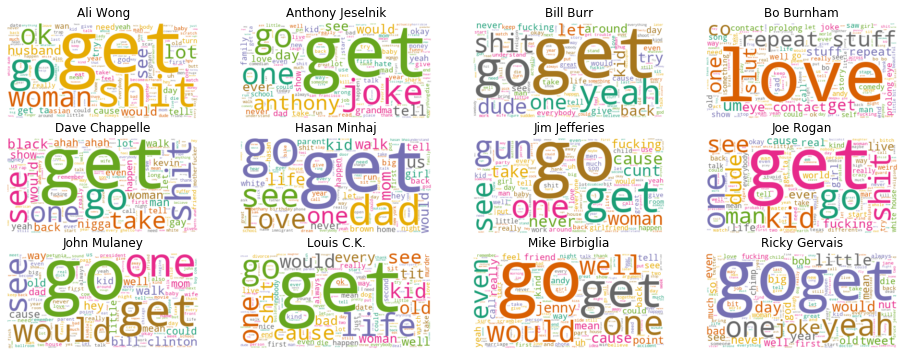

In [62]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcripts[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### 2. Number of words

In [63]:
# Finding the no. of unique words used by each of the comedians

unique_list = []

for c in data.columns:
    unique_word = data[c].nonzero()[0].size
    unique_list.append(unique_word)
    
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns = ['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by = 'unique_words')
data_unique_sort

,comedian,unique_words
1,Anthony Jeselnik,796
9,Louis C.K.,889
6,Jim Jefferies,1036
3,Bo Burnham,1100
8,John Mulaney,1143
4,Dave Chappelle,1148
0,Ali Wong,1150
7,Joe Rogan,1154
10,Mike Birbiglia,1202
5,Hasan Minhaj,1287


In [64]:
# Calculating words per minute of each comedian

total_list = []
for c in data.columns:
    totals = sum(data[c])
    total_list.append(totals)
    
# Comedy special run-times from Imdb (in minutes)

run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

#Adding new columns to the dataset

data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_min'] = data_words['total_words']/data_words['run_times']


#Sorting the dataframe by words per min to find the slowest amd the fastes speaker

data_wpm_sort = data_words.sort_values(by = 'words_per_min')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_min
1,Anthony Jeselnik,796,2509,59,42.525424
3,Bo Burnham,1100,2836,60,47.266667
9,Louis C.K.,889,2808,58,48.413793
0,Ali Wong,1150,2912,60,48.533333
6,Jim Jefferies,1036,3947,77,51.259740
11,Ricky Gervais,1343,4140,79,52.405063
10,Mike Birbiglia,1202,3996,76,52.578947
4,Dave Chappelle,1148,3585,67,53.507463
5,Hasan Minhaj,1287,4056,73,55.561644
8,John Mulaney,1143,3520,62,56.774194


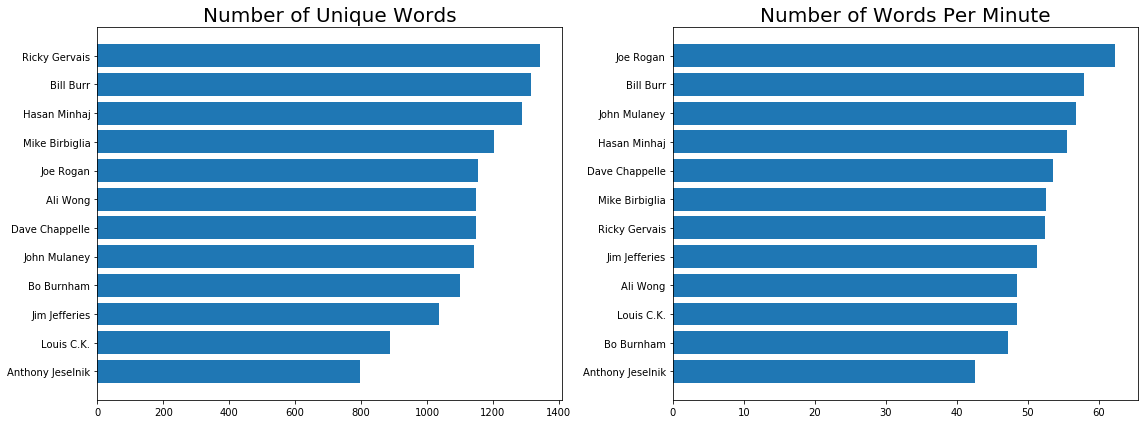

In [65]:
# Plotting the findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_min, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

### 3. Profanity analysis

In [66]:
# Segregating cuss words

cuss_words = data.transpose()[['fuck', 'shit', 'ass']]
data_profanity = pd.concat([cuss_words.fuck, cuss_words.shit, cuss_words.ass], axis = 1)
data_profanity.columns = ['f_cuss', 's_cuss', 'a_cuss']
data_profanity

,f_cuss,s_cuss,a_cuss
ali,16,36,0
anthony,17,9,0
bill,86,65,0
bo,31,7,0
dave,58,46,0
hasan,26,16,0
jim,102,20,0
joe,115,40,1
john,3,7,0
louis,21,27,0


#### Plotting the findings with a scatter plot

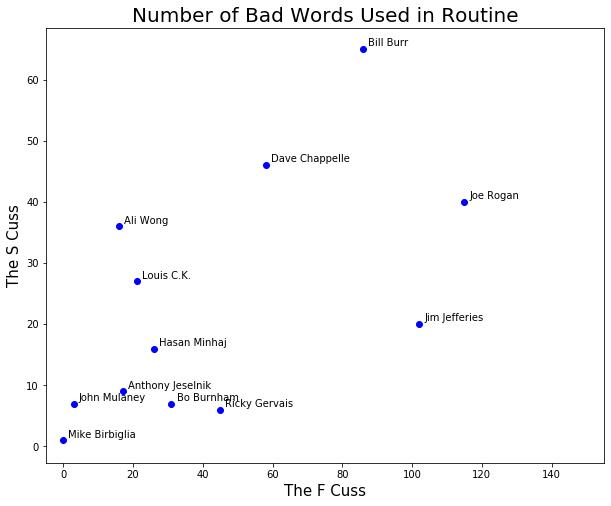

In [67]:
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_cuss.loc[comedian]
    y = data_profanity.s_cuss.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('The F Cuss', fontsize=15)
plt.ylabel('The S Cuss', fontsize=15)

plt.show()